In [160]:
%matplotlib inline

In [161]:
import array

import random
import numpy as np

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import matplotlib.pyplot as plt

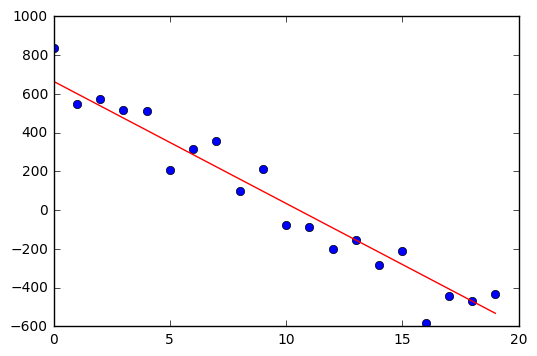

In [180]:
N, D = 20, 2

theta_target = np.array([-63, 665]).reshape(D, 1)

E = np.random.normal(0, 106, N).reshape(N, 1)
X = np.ones(shape=(N, D))
X[:, 0] = np.arange(N)
Y = X.dot(theta_target)+E

plt.plot(X[:, 0], Y, 'o')
plt.plot(X[:, 0], Y-E, 'k-', color='red')
plt.show()

In [181]:
def L(theta):
    y = X.dot(theta)
    return np.sum(np.sqrt((Y.T - y)**2)),

In [182]:
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", numpy.ndarray, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("attr_int", random.randint, -1000, 1000)

toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, D)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [183]:
def cxTwoPointCopy(ind1, ind2):
    """Execute a two points crossover with copy on the input individuals. The
    copy is required because the slicing in numpy returns a view of the data,
    which leads to a self overwritting in the swap operation. """
    size = len(ind1)
    cxpoint1 = random.randint(1, size)
    cxpoint2 = random.randint(1, size - 1)
    if cxpoint2 >= cxpoint1:
        cxpoint2 += 1
    else: # Swap the two cx points
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1

    ind1[cxpoint1:cxpoint2], ind2[cxpoint1:cxpoint2] \
        = ind2[cxpoint1:cxpoint2].copy(), ind1[cxpoint1:cxpoint2].copy()
        
    return ind1, ind2

In [184]:
toolbox.register("evaluate", L)
toolbox.register("mate", cxTwoPointCopy)
toolbox.register("mutate", tools.mutUniformInt, low=-1000, up=1000, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


history = tools.History()
toolbox.decorate("mate", history.decorator)
toolbox.decorate("mutate", history.decorator)


In [201]:
random.seed(64)
NGEN = 15
POPN = 80

pop = toolbox.population(n=POPN)
hof = tools.HallOfFame(1, similar=numpy.array_equal)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=NGEN, 
                               stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg    	std    	min    	max   
0  	80    	99227.5	55834.6	4280.61	206803
1  	56    	56087  	41282.5	2140.03	159104
2  	50    	25975.2	18824.7	2140.03	95407.4
3  	45    	13694.5	12604.1	1993.99	77114.6
4  	46    	9165.51	20716.5	1993.99	139941 
5  	43    	3824.75	1577.98	1993.99	10170.6
6  	52    	2773.73	642.538	1858.56	3799.79
7  	48    	2229.87	510.196	1858.56	3608.96
8  	39    	2517.82	5437.4 	1858.56	50833.1
9  	47    	1926.55	574.236	1858.56	7027.01
10 	57    	1858.56	0      	1858.56	1858.56
11 	43    	3227.55	11530.7	1858.56	105553 
12 	56    	1858.56	0      	1858.56	1858.56
13 	43    	3996.68	16641.8	1858.56	150203 
14 	47    	1858.56	0      	1858.56	1858.56
15 	40    	2602.08	4454.04	1858.56	31403.1


In [202]:
theta = hof.items[0].reshape(D, 1)

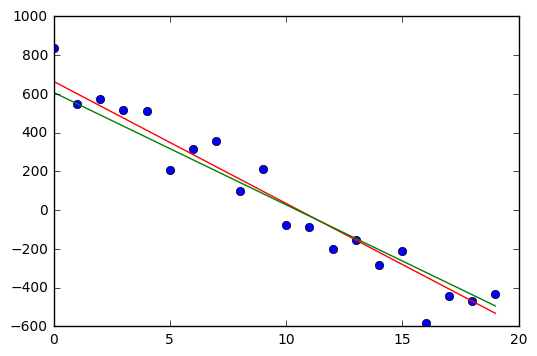

In [203]:
y = X.dot(theta)

plt.plot(X[:, 0], Y, 'o')
plt.plot(X[:, 0], Y-E, 'k-', color='red')
plt.plot(X[:, 0], y, 'k-', color='green')
plt.show()

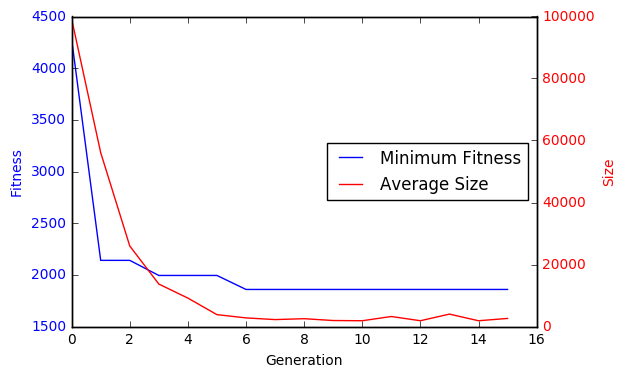

In [204]:
gen = log.select("gen")
fit_mins = log.select("min")
size_avgs = log.select("avg")

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

plt.show()